# Question 2

In [3]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.collections import LineCollection

from scipy.fftpack import fft, fftfreq

mpl.rcParams.update({'font.size': 12})

In [4]:
# Final time of the simulation
final_time = 50.

# PDE parameter
Lx = 10.

#### Set up PDE

In [5]:
# Define PDE values

# Number of points in the computational grid
Nx = 128

# CFL factor
CFL = 0.1

# PDE Parameters
v = 0.1

In [6]:
# dx and dt
delta_x = Lx / Nx
delta_t = CFL * delta_x**2 / v

print("Delta t = {0:g}, Delta x = {1:g}".format(delta_t, delta_x))

# Create spatial grid
x = np.arange(delta_x / 2. - Lx/2, Lx/2, delta_x)

# Specify the number of time points to store (Nouts)
#  they will be equally spaced throughout the simulation.
Nouts = 200
output_interval = final_time / Nouts
t = np.zeros(Nouts + 1)
t[0] = 0.

# Create an array to store the solution, and write in the initial conditions
solution = np.zeros((Nouts + 1,Nx))
solution[0,:] = np.sin( 4 * np.pi * x / Lx ) + 0.25 * np.sin( 8 * np.pi * x / Lx )
u = solution[0, :]

Delta t = 0.00610352, Delta x = 0.078125


#### Plot ICs

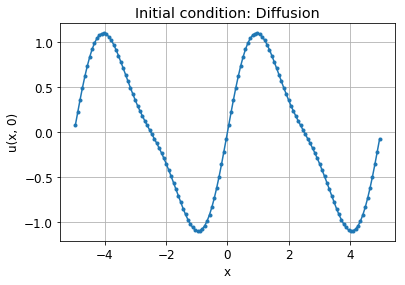

In [7]:
plt.plot( x, u, '.-' )
plt.grid()
plt.xlabel('x')
plt.ylabel('u(x, 0)')
plt.title('Initial condition: Diffusion')
plt.savefig('Question2/diffusion_ic_Nx={}.png'.format(Nx))

#### Compute Second Derivative

In [8]:
def d2dx2(f, dx = delta_x):
    return (np.roll(f, 1) - 2 * f + np.roll(f, -1) ) / ( dx**2 )

## Part (b): Error vs $\Delta x$

In [9]:
def finite_difference(NModes):
    Lx = 2 * np.pi
    Nxs = np.power(2, np.arange(2, 9))
    
    # Create arrays to store the error values
    err_2 = np.zeros(Nxs.shape)
    
    # Create figure
    fig, ax = plt.subplots(1, 1, figsize = (11, 4))
    
    for ind, Nx in enumerate(Nxs):
        
        # Create grid
        dx = Lx / Nx
        x = np.linspace(0, Lx, Nx + 1)[:-1]
        
        # Function to differentiate
        y = np.sin(NModes * x)
        
        # True derivatives
        dydx2_true = -NModes**2 * np.sin(NModes * x)
        
        # Compute the numerical derivatives
        Ord2 = d2dx2(y, dx = dx)
        
        # Store the error in the numerical derivatives
        err_2[ind] = np.sqrt(np.mean((Ord2 - dydx2_true)**2))
      
    # Plot the numerical errors
    ax.plot(Lx/Nxs, err_2, '-o', label='2nd order (numerical)')
    
    ax.plot(Lx/Nxs, (Lx/Nxs)**2, '--k', label='$dx^2$')
    
    lgd = ax.legend(bbox_to_anchor=(1., 0, 0.25, 1))
    x = ax.set_xlabel('$\Delta x$')
    y = ax.set_ylabel('Finite Difference Error')
    title = ax.set_title('Error vs $\Delta x$: Second Derivative'.format(NModes))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid()
    
    fig.tight_layout()
    fig.savefig('Question2/question2b.png'.format(NModes), bbox_extra_artists=(lgd, title, y, x), bbox_inches='tight')
    return fig, ax

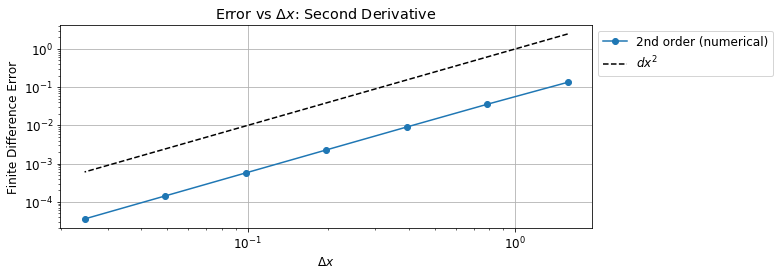

In [10]:
fig, ax = finite_difference(1)

## Part (d): Solve PDE

#### Compute Numerical Solution

In [11]:
curr_time = t[0]
u = solution[0,:]
next_output_time = output_interval
output_number = 0
while curr_time < final_time:
    
    # Compute the RHS of the ODE
    dudt = v * d2dx2( u )
    
    # Update first-order record
    u = u + delta_t * dudt
    
    # Increase 'time' by Delta t
    curr_time = curr_time + delta_t
    
    # Store the new values in our array, if at the right time
    if curr_time >= next_output_time:
        output_number = output_number + 1
        next_output_time += output_interval
        
        solution[output_number,:] = u
        t[output_number] = curr_time
    
# Helps to avoid odd errors from funky step sizes
t = t[:output_number]
solution = solution[:output_number,:]

In [12]:
print( "The stored solution has {0:d} time points and {1:d} space points.".format(*solution.shape) )

The stored solution has 200 time points and 128 space points.


#### Plot Solution

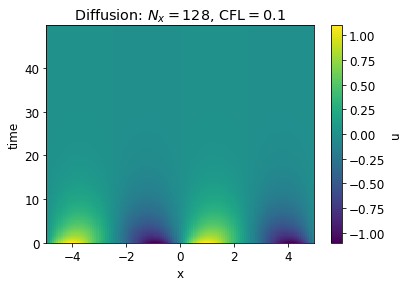

In [13]:
tmax = len(t)
cv = np.max( np.abs( solution[0,:] ) )
plt.pcolormesh( x, t[:tmax], solution[:tmax,:], vmin = -cv, vmax = cv)

cbar = plt.colorbar()
cbar.ax.set_ylabel('u')

plt.xlabel('x')
plt.ylabel('time')
plt.title('Diffusion: $N_x={0}$, CFL$={1}$'.format(Nx, CFL))
plt.savefig('Question2/diffusion_3d_Nx={0}_cfl={1}.png'.format(Nx, CFL))

## Part (e)

In [14]:
E = []
for i in range(len(t)):
    E.append(np.sum(solution[i,:]**2 * delta_x))

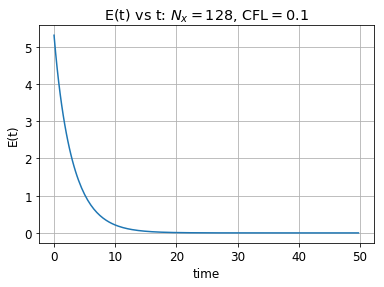

In [15]:
plt.plot(t, E)
plt.xlabel('time')
plt.ylabel('E(t)')
plt.title('E(t) vs t: $N_x={0}$, CFL$={1}$'.format(Nx, CFL))
# plt.ylim(0, 10)
plt.grid()
plt.savefig('Question2/diffusion_energy_Nx={0}_cfl={1}.png'.format(Nx, CFL))

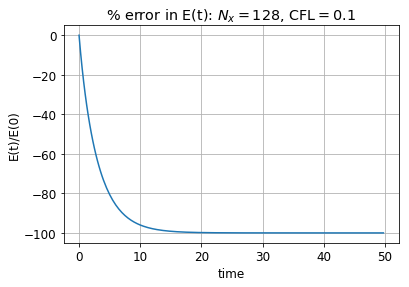

In [16]:
plt.plot(t, (E-E[0])/E[0] * 100)
plt.xlabel('time')
plt.ylabel('E(t)/E(0)')
plt.title('% error in E(t): $N_x={0}$, CFL$={1}$'.format(Nx, CFL))
# plt.ylim(-20, 20)
plt.grid()
plt.savefig('Question2/diffusion_percent_energy_Nx={0}_cfl={1}.png'.format(Nx, CFL))